In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.0 anndata==0.7.5 umap==0.5.1 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
results_file = 'write/CS23_processing.h5ad'

In [4]:
adata = sc.read_10x_mtx(
    '/mnt/d/Nishino/DRY/data/analysis/JAGGED1/210420_human_Liver_CS23/processed/cellranger/Human_Liver_CS23/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)      

... reading from cache file cache/mnt-d-Nishino-DRY-data-analysis-JAGGED1-210420_human_Liver_CS23-processed-cellranger-Human_Liver_CS23-outs-filtered_feature_bc_matrix-matrix.h5ad


In [5]:
adata

AnnData object with n_obs × n_vars = 8629 × 36601
    var: 'gene_ids', 'feature_types'

normalizing counts per cell
    finished (0:00:00)


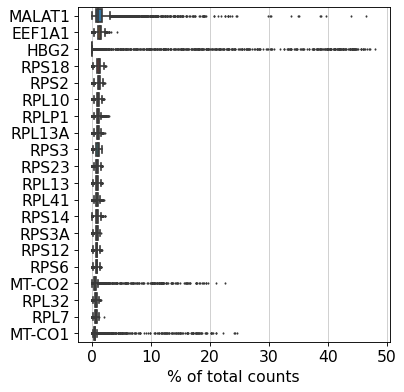

In [6]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [7]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
adata.var['ribo'] = adata.var_names.str.startswith(("RPS","RPL"))
adata.var['hb'] = adata.var_names.str.startswith(("HBA","HBB","HBG"))

In [8]:
adata.var

,gene_ids,feature_types,mt,ribo,hb
MIR1302-2HG,ENSG00000243485,Gene Expression,False,False,False
FAM138A,ENSG00000237613,Gene Expression,False,False,False
OR4F5,ENSG00000186092,Gene Expression,False,False,False
AL627309.1,ENSG00000238009,Gene Expression,False,False,False
AL627309.3,ENSG00000239945,Gene Expression,False,False,False
...,...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,False,False,False
AC023491.2,ENSG00000278633,Gene Expression,False,False,False
AC007325.1,ENSG00000276017,Gene Expression,False,False,False
AC007325.4,ENSG00000278817,Gene Expression,False,False,False


In [9]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)

In [10]:
adata

AnnData object with n_obs × n_vars = 8629 × 36601
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

... storing 'feature_types' as categorical


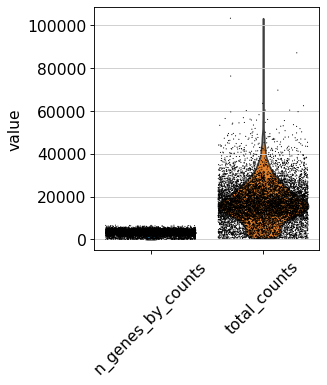

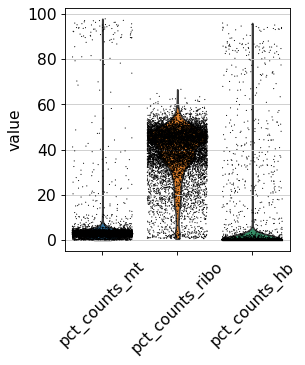

In [11]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4, rotation= 45)
sc.pl.violin(adata, ['pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'], jitter=0.4, rotation= 45)

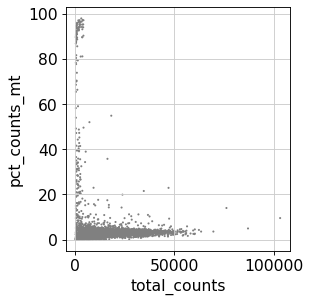

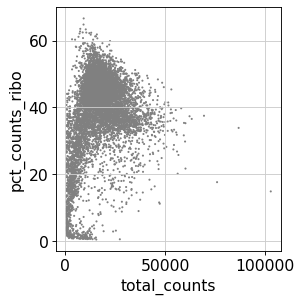

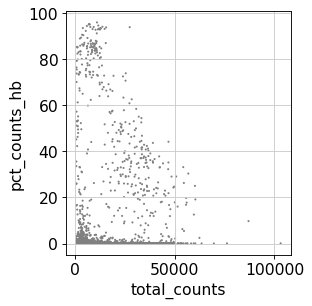

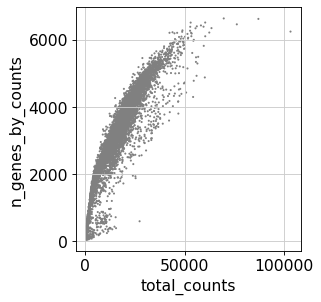

In [12]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_ribo')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_hb')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [13]:
adata = adata[adata.obs['pct_counts_mt'] < 10, :]
adata = adata[adata.obs['pct_counts_ribo'] > 5, :]
adata = adata[adata.obs['pct_counts_hb'] < 10, :]

/home/analysis/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/analysis/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/analysis/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [14]:
adata

View of AnnData object with n_obs × n_vars = 8030 × 36601
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [15]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Trying to set attribute `.obs` of view, copying.
filtered out 15590 genes that are detected in less than 3 cells


In [16]:
adata

AnnData object with n_obs × n_vars = 8030 × 21011
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

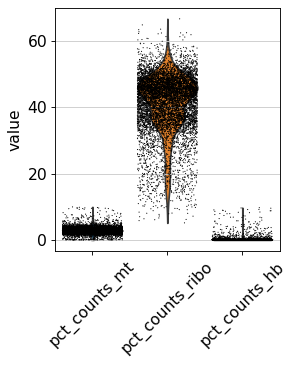

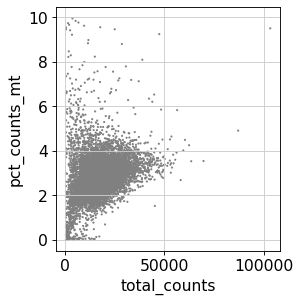

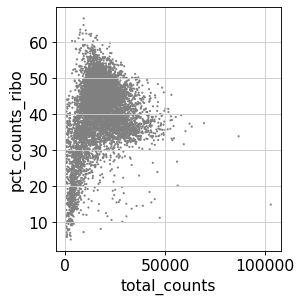

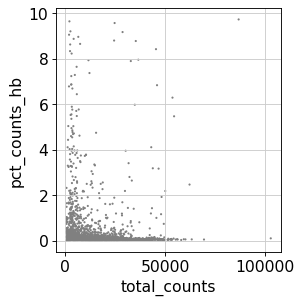

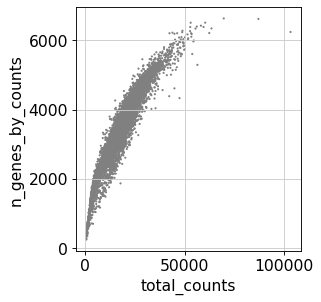

In [17]:
sc.pl.violin(adata, ['pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'], jitter=0.4, rotation= 45)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_ribo')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_hb')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [18]:
malat1 = adata.var_names.str.startswith('MALAT1')
mito_genes = adata.var_names.str.startswith('MT-')
hb_genes = adata.var_names.str.startswith(('HBA','HBB','HBG'))

remove = np.add(mito_genes, malat1)
remove = np.add(remove, hb_genes)
keep = np.invert(remove)

adata = adata[:,keep]

print(adata.n_obs, adata.n_vars)

8030 20992


/home/analysis/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [19]:
adata.raw = adata

In [20]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


Preprocessing...


/home/analysis/miniconda3/lib/python3.8/site-packages/scrublet/helper_functions.py:241: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 8.2%
Elapsed time: 8.8 seconds


10

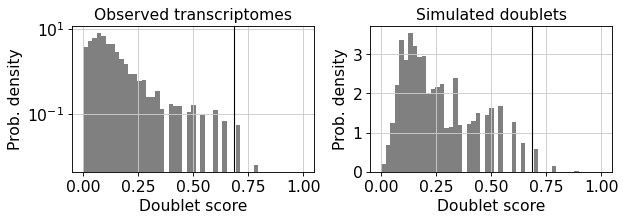

In [21]:
import scrublet as scr
scrub = scr.Scrublet(adata.raw.X)
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata.obs['predicted_doublets'])

In [22]:
adata.obs['doublet_info'] = adata.obs["predicted_doublets"].astype(str)

... storing 'doublet_info' as categorical


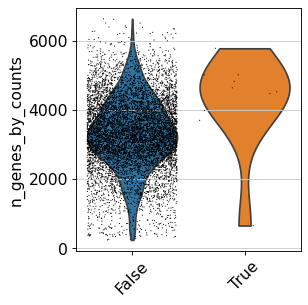

In [23]:
sc.pl.violin(adata, 'n_genes_by_counts',
             jitter=0.4, groupby = 'doublet_info', rotation=45)

In [24]:
adata = adata.raw.to_adata() 

adata = adata[adata.obs['doublet_info'] == 'False',:]
print(adata.shape)

(8020, 20992)


/home/analysis/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [25]:
CS23_raw=sc.get.obs_df(adata, keys=["ACTA2","JAG1","SNAI2"])
CS23_raw.to_csv('211214_CS23_raw_ACTA2_JAG1_SNAI2.tsv', sep='\t', index = True)

In [27]:
CS23_raw_EGR1=sc.get.obs_df(adata, keys=["ACTA2","JAG1","EGR1"])
CS23_raw_EGR1.to_csv('211215_CS23_raw_ACTA2_JAG1_EGR1.tsv', sep='\t', index = True)

In [26]:
adata.write(results_file)